In [1]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Lyft_data = pd.read_csv('./train.csv')
object_columns = ['sample_id', 'object_id', 'center_x', 'center_y', 'center_z',
                  'width', 'length', 'height', 'yaw', 'class_name']
objects = []
for sample_id, ps in Lyft_data.values[:]:
    object_params = ps.split()
    n_objects = len(object_params)
    for i in range(n_objects // 8):
        x, y, z, w, l, h, yaw, c = tuple(object_params[i * 8: (i + 1) * 8])
        objects.append([sample_id, i, x, y, z, w, l, h, yaw, c])
train_objects = pd.DataFrame(
    objects,
    columns = object_columns
)
train_objects.head()

,sample_id,object_id,center_x,center_y,center_z,width,length,height,yaw,class_name
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,0,2680.2830359778527,698.1969292852777,-18.04776692365821,2.064,5.488,2.053,2.6041643845397946,car
1,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,1,2691.997461646401,660.8016536569899,-18.674258695658377,1.818,4.57,1.608,-0.33517602468486984,car
2,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2,2713.6075009338388,694.4034809694599,-18.589971933264334,1.779,4.992,1.62,2.579455758321168,car
3,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,3,2679.986916931015,706.9101495091695,-18.349594424165822,1.798,3.903,1.722,2.5861656766206993,car
4,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,4,2659.352095715659,719.4174623706303,-18.442998898501283,1.936,4.427,1.921,2.601798964714126,car


In [3]:
train_objects.size

6381790

In [4]:
train_objects['class_name'].describe()

count     638179
unique         9
top          car
freq      534911
Name: class_name, dtype: object

In [5]:
train_objects.class_name.unique()

array(['car', 'truck', 'other_vehicle', 'bus', 'pedestrian', 'bicycle',
       'motorcycle', 'emergency_vehicle', 'animal'], dtype=object)

           object_id
count  534911.000000
mean       18.936965
std        14.360668
min         0.000000
25%         7.000000
50%        16.000000
75%        28.000000
max       129.000000


C:\Users\jaswa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


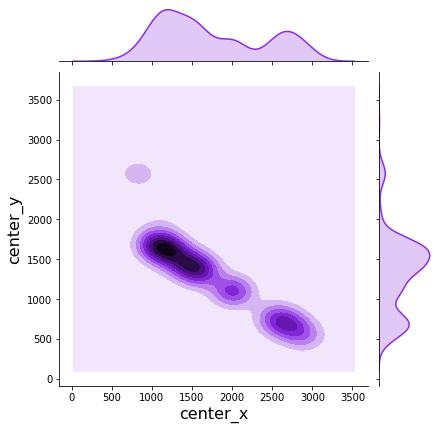

In [6]:
car_train_objects = train_objects.query('class_name == "car"')
print(car_train_objects.describe())
plot = sns.jointplot(x=car_train_objects['center_x'][:1000], y=car_train_objects['center_y'][:1000], kind='kde', color='blueviolet')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

          object_id
count  24935.000000
mean      17.129938
std       14.605495
min        0.000000
25%        5.000000
50%       13.000000
75%       26.000000
max      116.000000


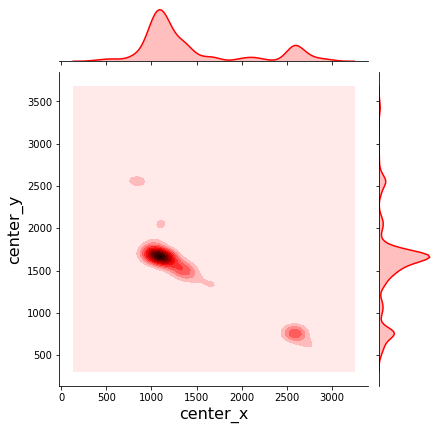

In [7]:
ped_train_objects = train_objects.query('class_name == "pedestrian"')
print(ped_train_objects.describe())
plot = sns.jointplot(x=ped_train_objects['center_x'][:1000], y=ped_train_objects['center_y'][:1000], kind='kde', color='red')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

          object_id
count  20928.000000
mean      22.337729
std       19.898835
min        0.000000
25%        6.000000
50%       18.000000
75%       33.000000
max      128.000000


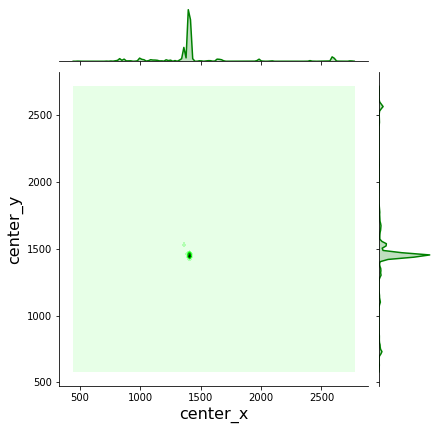

In [8]:
bike_train_objects = train_objects.query('class_name == "bicycle"')
print(bike_train_objects.describe())
plot = sns.jointplot(x=bike_train_objects['center_x'][:1000], y=bike_train_objects['center_y'][:1000], kind='kde', color='green')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

       object_id
count  818.00000
mean    17.51467
std     14.32369
min      0.00000
25%      6.00000
50%     15.00000
75%     26.00000
max    127.00000


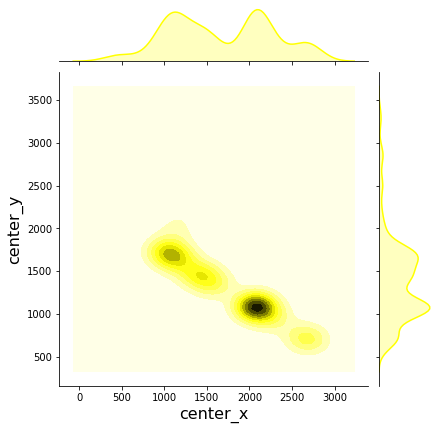

In [9]:
mcycle_train_objects = train_objects.query('class_name == "motorcycle"')
print(mcycle_train_objects.describe())
plot = sns.jointplot(x=mcycle_train_objects['center_x'][:1000], y=mcycle_train_objects['center_y'][:1000], kind='kde', color='yellow')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

         object_id
count  8729.000000
mean     17.227976
std      13.835431
min       0.000000
25%       6.000000
50%      14.000000
75%      26.000000
max      77.000000


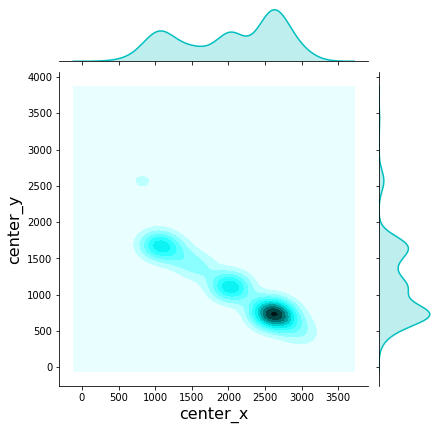

In [10]:
bus_train_objects = train_objects.query('class_name == "bus"')
print(bus_train_objects.describe())
plot = sns.jointplot(x=bus_train_objects['center_x'][:1000], y=bus_train_objects['center_y'][:1000], kind='kde', color='c')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

          object_id
count  14164.000000
mean      18.170714
std       14.312988
min        0.000000
25%        6.000000
50%       15.000000
75%       27.000000
max      102.000000


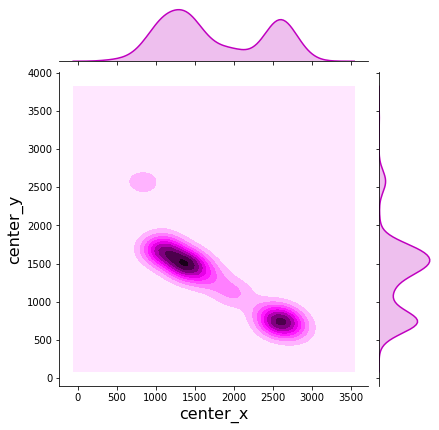

In [11]:
truck_train_objects = train_objects.query('class_name == "truck"')
print(truck_train_objects.describe())
plot = sns.jointplot(x=truck_train_objects['center_x'][:1000], y=truck_train_objects['center_y'][:1000], kind='kde', color='m')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

          object_id
count  33376.000000
mean      18.226480
std       12.881551
min        0.000000
25%        8.000000
50%       17.000000
75%       26.000000
max      113.000000


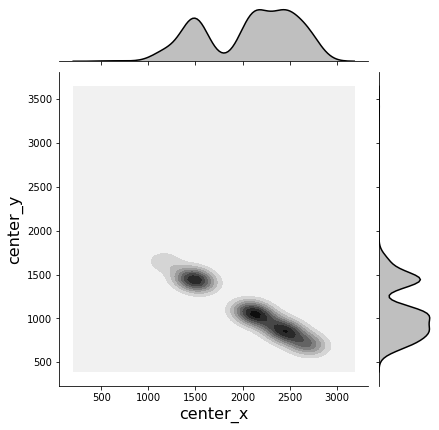

In [12]:
misc_train_objects = train_objects.query('class_name == "other_vehicle"')
print(misc_train_objects.describe())
plot = sns.jointplot(x=misc_train_objects['center_x'][:1000], y=misc_train_objects['center_y'][:1000], kind='kde', color='k')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

        object_id
count  132.000000
mean    15.219697
std     11.534425
min      0.000000
25%      6.000000
50%     12.500000
75%     22.000000
max     48.000000


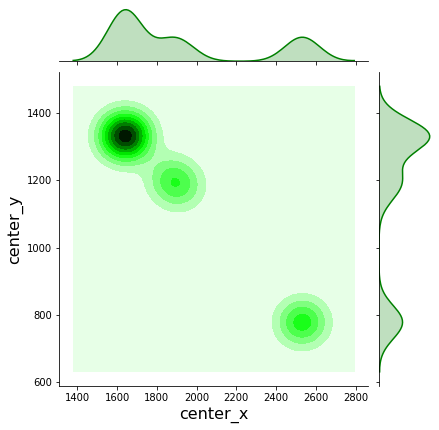

In [13]:
Em_train_objects = train_objects.query('class_name == "emergency_vehicle"')
print(Em_train_objects.describe())
plot = sns.jointplot(x=Em_train_objects['center_x'][:1000], y=Em_train_objects['center_y'][:1000], kind='kde', color='g')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

        object_id
count  186.000000
mean    17.145161
std     16.122685
min      0.000000
25%      5.000000
50%     12.000000
75%     23.750000
max     68.000000


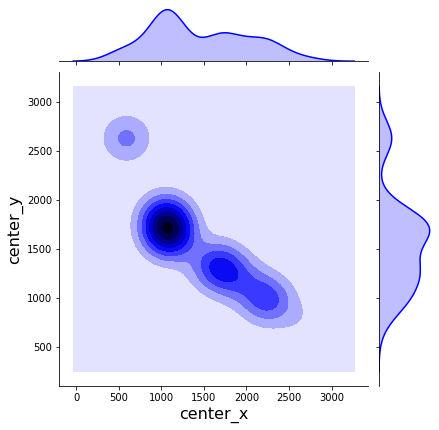

In [14]:
anim_train_objects = train_objects.query('class_name == "animal"')
print(anim_train_objects.describe())
plot = sns.jointplot(x=anim_train_objects['center_x'][:1000], y=anim_train_objects['center_y'][:1000], kind='kde', color='b')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

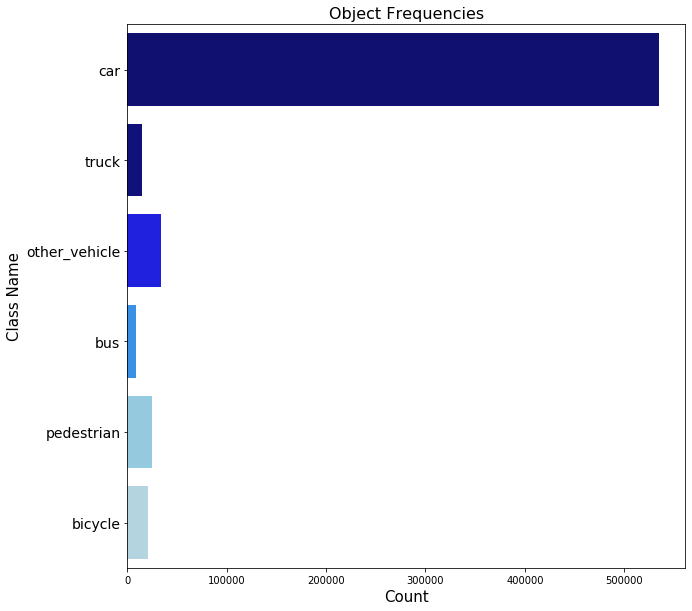

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = sns.countplot(y="class_name", data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                     palette=['navy', 'darkblue', 'blue', 'dodgerblue', 'skyblue', 'lightblue']).set_title('Object Frequencies', fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Class Name", fontsize=15)
plt.show(plot)